In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
import time
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score
import matplotlib.pyplot as plt

In [2]:
#Load data
data = pd.read_csv(r"C:\Users\g.davoulos\Downloads\Dataset2\DogMoveData_csv_format_2\DogMoveData_merged_2.csv")

In [3]:
#Split dataset in features and target variable
feature_cols = ['ABack_x', 'ABack_y', 'ABack_z', 'ANeck_x', 'ANeck_y', 'ANeck_z', 'GBack_x', 'GBack_y', 'GBack_z', 'GNeck_x', 'GNeck_y', 'GNeck_z']
X = data[feature_cols] # Features
y = data['Behavior'] # Target variable

In [4]:
# Assuming 'X' is your feature matrix and 'y' is your target vector
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a DecisionTreeClassifier as the base classifier
base_classifier = DecisionTreeClassifier(max_depth=5, random_state=42)

# Create a BaggingClassifier with the DecisionTree base classifier
bagging_classifier = BaggingClassifier(base_classifier, n_estimators=10, random_state=42)

# Measure the start time
start_time = time.time()

# Train the bagging classifier
bagging_classifier.fit(X_train, y_train)

# Measure the end time
end_time = time.time()

# Calculate the elapsed time
elapsed_time = end_time - start_time

# Make predictions
y_pred = bagging_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


# Print elapsed time
print("Elapsed Time:", elapsed_time, "seconds")

Accuracy: 0.6915620492134638
Elapsed Time: 351.4568235874176 seconds


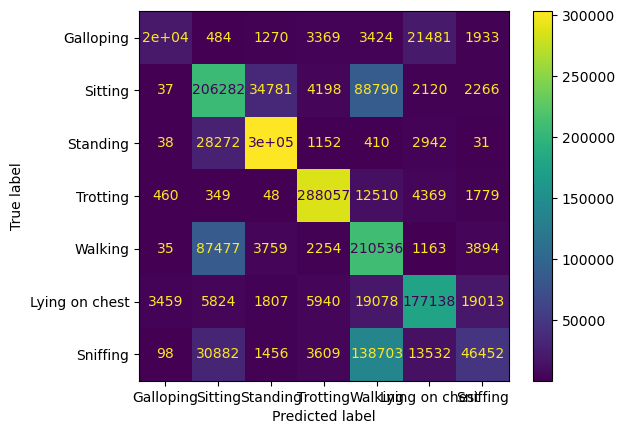

              precision    recall  f1-score   support

   Galloping       0.83      0.39      0.53     52256
 Lying chest       0.57      0.61      0.59    338474
     Sitting       0.88      0.90      0.89    336313
    Sniffing       0.93      0.94      0.94    307572
    Standing       0.44      0.68      0.54    309118
    Trotting       0.80      0.76      0.78    232259
     Walking       0.62      0.20      0.30    234732

    accuracy                           0.69   1810724
   macro avg       0.72      0.64      0.65   1810724
weighted avg       0.71      0.69      0.68   1810724



In [5]:
#Confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Galloping', 'Sitting', 'Standing', 'Trotting', 'Walking','Lying on chest', 'Sniffing'])
disp.plot()
plt.show()
print(classification_report(y_test, y_pred))